In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'   # 한글 폰트 사용
plt.rcParams['font.size'] = 20   # Matplotlib 폰트 사이즈 변경
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상해결

### 데이터 확인

In [2]:
sunny = pd.read_csv('태양열에너지생산데이터.csv', encoding = 'cp949')
sunny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.6 MB


In [3]:
# 상위 10개
sunny.head(10)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
5,0,2,30,0,0,1.5,69.29,-11,0.0
6,0,3,0,0,0,1.5,72.56,-11,0.0
7,0,3,30,0,0,1.4,72.55,-11,0.0
8,0,4,0,0,0,1.3,74.62,-11,0.0
9,0,4,30,0,0,1.3,74.61,-11,0.0


### 각 Columns 의미 파악

In [4]:
sunny.columns

Index(['Day', 'Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET'], dtype='object')

**Day: 일** <br>
**Hour: 시간** <br>
**Minute: 분** <br>
**DHI: 수평면 산란일사량** <br>
**DNI: 직달 일사량** <br>
**WS: 풍속** <br>
**T: 기온** <br>
**Target: 태양광 발전량** <br>

In [5]:
# DHI, DNI 기준으로 큰 값부터 정렬
sunny1 = sunny.sort_values(['DHI','DNI'], ascending = False)
sunny1.head(10)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
7752,161,12,0,528,377,3.1,57.21,19,83.413342
8232,171,12,0,526,375,3.0,20.35,32,83.213793
8328,173,12,0,524,374,0.9,22.26,31,82.839444
43608,908,12,0,523,392,3.6,18.40,30,84.435243
8856,184,12,0,523,374,2.8,28.17,31,82.651812
43561,907,12,30,523,368,3.5,13.13,33,82.087112
7992,166,12,0,523,366,2.2,43.75,24,82.001411
26472,551,12,0,522,379,3.3,16.27,32,83.026163
8376,174,12,0,522,367,2.8,23.56,29,82.090722
26136,544,12,0,521,375,2.5,29.33,28,82.560719


In [6]:
# DHI > 500이면서 DNI >= 350인 데이터를 T 컬럼 값 기준 오름차순 정렬

sunny2 = sunny.loc[(sunny['DHI'] > 500) & (sunny['DNI'] >= 350),['Day', 'DHI', 'DNI', 'WS', 'RH', 'T','TARGET']].sort_values(['T'])
sunny2

,Day,DHI,DNI,WS,RH,T,TARGET
24551,511,512,370,5.8,67.06,10,80.887980
41783,870,504,388,0.6,37.73,15,81.446529
6936,144,511,408,1.2,41.97,16,84.166744
7463,155,511,397,3.5,80.98,17,83.415176
7752,161,528,377,3.1,57.21,19,83.413342
24168,503,504,368,1.4,30.38,20,79.846990
42024,875,502,361,5.0,29.01,21,79.189329
24793,516,510,397,2.6,31.46,22,83.222941
24407,508,512,387,4.7,21.60,22,82.284689
7559,157,504,417,1.8,36.10,22,84.536494


In [7]:
# T 컬럼을 기준으로 그룹화하고 TARGET 컬럼의 합계 계산
sunny3 = sunny2.groupby(['T'])['TARGET'].sum().reset_index()

# T 컬럼 값을 기준으로 오름차순 정렬
sunny3 = sunny3.sort_values(['T'], ascending=True)
sunny3

,T,TARGET
0,10,80.887980
1,15,81.446529
2,16,84.166744
3,17,83.415176
4,19,83.413342
5,20,79.846990
6,21,79.189329
7,22,250.044124
8,23,329.041315
9,24,249.381865


### 시각화 

Text(0.5, 1.0, '온도별 태양광 발전 현황')

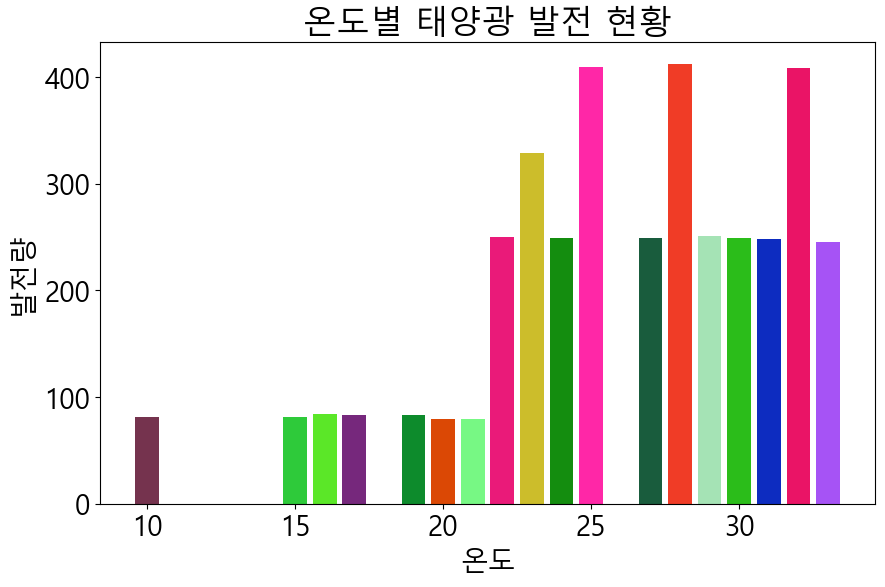

In [8]:
# 변수 지정
T = sunny3['T']
TARGET = sunny3['TARGET']

# 색상을 데이터 건수만큼 랜덤으로 생성하기
colors = [np.random.rand(3,) for _ in T]

# Bar Chart (가로 10, 세로 6)
plt.figure(figsize=(10, 6))
plt.bar(T, TARGET, color = colors)

# label 생성
plt.xlabel('온도')
plt.ylabel('발전량')
plt.title('온도별 태양광 발전 현황')

### 수평면 산란 일사량과 태양열 발전량의 상관관계

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '-100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

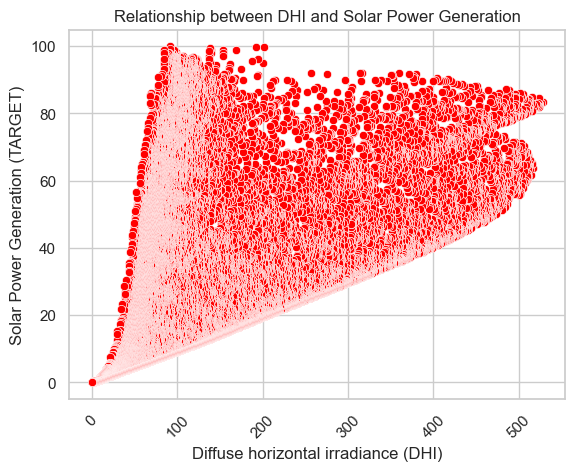

In [9]:
sns.set(font_scale=1.5)  
sns.set(style="whitegrid")
sns.scatterplot(x = sunny1['DHI'], y = sunny1['TARGET'], data=sunny1, color = 'red')

plt.xlabel('Diffuse horizontal irradiance (DHI)')
plt.ylabel('Solar Power Generation (TARGET)')
plt.title('Relationship between DHI and Solar Power Generation')
plt.xticks(rotation=45)

In [10]:
# DHI, TARGET 사이의 상관 계수 구하기
DT_corr = np.corrcoef(sunny1['DHI'], sunny1['TARGET'])[0, 1]
DT_corr

0.666908072926523

### 풍속과 태양열 발전량의 상관관계

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(-2.0, 0, '-2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

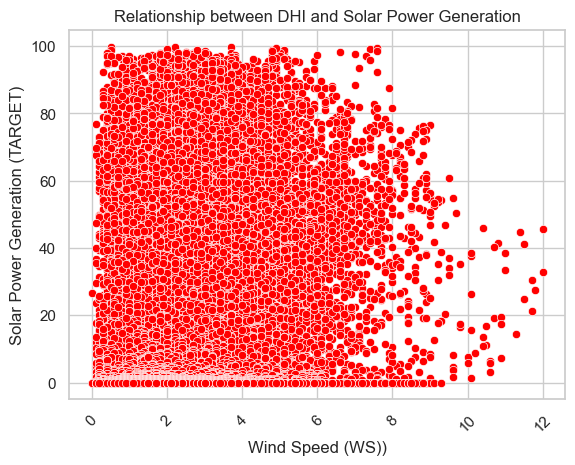

In [11]:
sns.set(font_scale=1.5)  
sns.set(style="whitegrid")
sns.set_palette("Paired")
sns.scatterplot(x = sunny1['WS'], y = sunny1['TARGET'], data=sunny1, color = 'red')

plt.xlabel('Wind Speed (WS))')
plt.ylabel('Solar Power Generation (TARGET)')
plt.title('Relationship between DHI and Solar Power Generation')
plt.xticks(rotation=45)

In [12]:
# WS, TARGET 사이의 상관 계수 구하기
WT_corr = np.corrcoef(sunny1['WS'], sunny1['TARGET'])[0, 1]
WT_corr

0.2385214806368923